# Instanciate the 'train' and 'test' dataloaders

In [3]:
from ocdc_dataloader import *

dataset_dir = "../../datasets/OCDC"

batch_size = 6
patch_size = (640, 640)
color_model = "LAB"
dataloaders = create_dataloader(tile_size="{}x{}".format(patch_size[0], patch_size[1]),
                                batch_size=batch_size, 
                                shuffle=True,
                                img_input_size=patch_size,
                                img_output_size=patch_size,
                                dataset_dir=dataset_dir,
                                color_model=color_model,
                                augmentation_strategy="random",
                                start_epoch=1,
                                validation_split=0.0)

dataset_train_size = len(dataloaders['train'].dataset)
dataset_test_size = len(dataloaders['test'].dataset)

2021-07-31 17:54:15,412 :: INFO load_dataset :: [training] ../../datasets/OCDC/training
2021-07-31 17:54:15,422 :: INFO load_dataset :: [training] ../../datasets/OCDC/training
2021-07-31 17:54:15,432 :: INFO load_dataset :: [testing] ../../datasets/OCDC/testing
2021-07-31 17:54:15,436 :: INFO create_dataloader :: Train images (640x640): 840 augmentation: random
2021-07-31 17:54:15,437 :: INFO create_dataloader :: Test images (640x640): 180 augmentation: no_augmentation


# Show some train images

2021-07-31 17:54:19,157 :: INFO transform :: Epoch: '1' augmentation random None
2021-07-31 17:54:19,406 :: INFO dataset_show :: Batch 1: 6/840 images torch.Size([6, 3, 640, 640]) masks torch.Size([6, 640, 640])


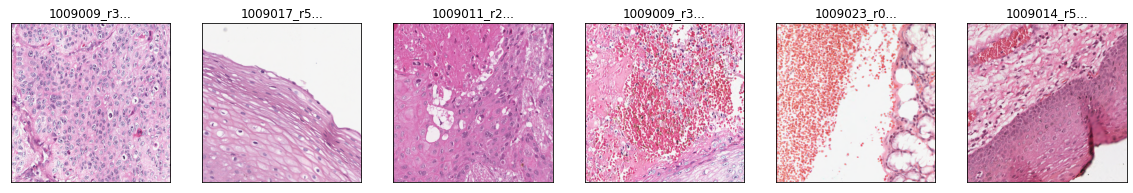

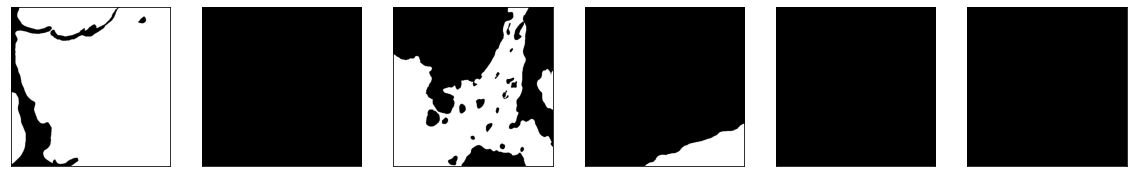

In [4]:
dataset_show(dataloaders['train'], batch_size=batch_size, show_masks=True, row_limit=1)

# Show some test images

2021-07-31 17:54:22,703 :: INFO transform :: Epoch: '1' augmentation no_augmentation None
2021-07-31 17:54:22,938 :: INFO dataset_show :: Batch 1: 6/180 images torch.Size([6, 3, 640, 640]) masks torch.Size([6, 640, 640])


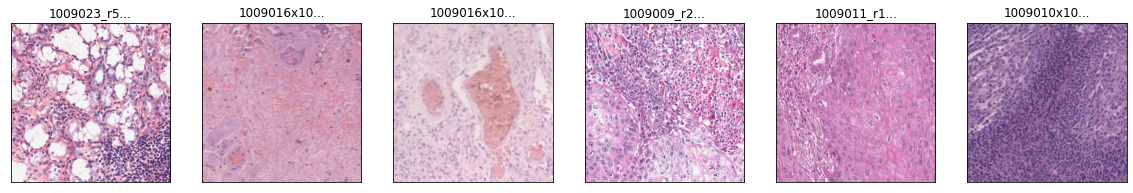

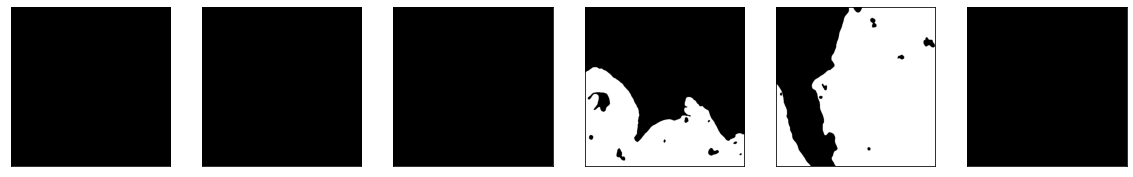

In [5]:
dataset_show(dataloaders['test'], batch_size=batch_size, show_masks=True, row_limit=1)

# Visualizing some data augmentation transformations

2021-11-21 09:50:42,670 :: INFO load_dataset :: [training] ../../datasets/OCDC/training
2021-11-21 09:50:42,680 :: INFO load_dataset :: [training] ../../datasets/OCDC/training
2021-11-21 09:50:42,692 :: INFO load_dataset :: [testing] ../../datasets/OCDC/testing
2021-11-21 09:50:42,698 :: INFO create_dataloader :: Train images (640x640): 840 augmentation: random
2021-11-21 09:50:42,699 :: INFO create_dataloader :: Test images (640x640): 180 augmentation: no_augmentation
2021-11-21 09:50:42,888 :: INFO transform :: Epoch: '1' augmentation random None
2021-11-21 09:51:02,567 :: INFO load_dataset :: [training] ../../datasets/OCDC/training
2021-11-21 09:51:02,576 :: INFO load_dataset :: [training] ../../datasets/OCDC/training
2021-11-21 09:51:02,585 :: INFO load_dataset :: [testing] ../../datasets/OCDC/testing
2021-11-21 09:51:02,590 :: INFO create_dataloader :: Train images (640x640): 840 augmentation: random
2021-11-21 09:51:02,590 :: INFO create_dataloader :: Test images (640x640): 180 a

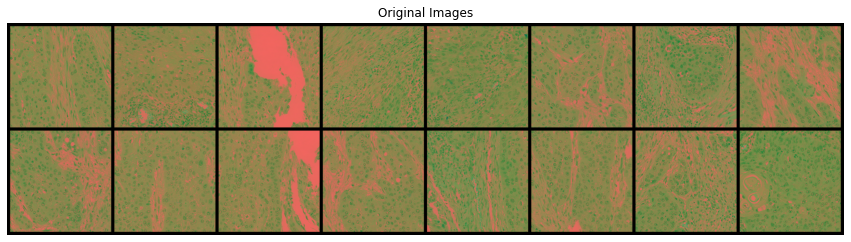

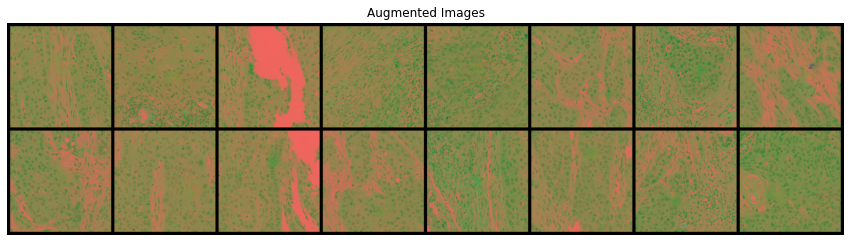

In [1]:
from ocdc_dataloader import *
import torchvision.utils as vutils

dataset_dir = "../../datasets/OCDC"


img_index = -1
img_name = '1009010x1000902_r39c49.png'
augmentation = ["inpainting"]
#[None, "horizontal_flip", "vertical_flip", "rotation", "transpose", "elastic_transformation", "grid_distortion", "optical_distortion", "color_transfer", "inpainting"]

batch_size = 16
patch_size = (640, 640)
color_model = "LAB"

# original
dataloaders = create_dataloader(tile_size="{}x{}".format(patch_size[0], patch_size[1]),
                                batch_size=batch_size, 
                                shuffle=False,
                                img_input_size=patch_size,
                                img_output_size=patch_size,
                                dataset_dir=dataset_dir,
                                color_model=color_model,
                                augmentation = augmentation,
                                augmentation_strategy="random",
                                start_epoch=1,
                                validation_split=0.0)
for batch_idx, (images, masks, fname, output_size) in enumerate(dataloaders['train']):
    if img_name in fname:
        img_index = fname.index(img_name)
        break

plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Original Images")
plt.imshow(np.transpose(vutils.make_grid(images[:16], padding=20, normalize=True).cpu(),(1,2,0)))

img_lab = pil_to_np(transforms.ToPILImage()(images[img_index].squeeze(0)))
img_rgb = lab_to_rgb(img_lab)
img_rgb = torch.from_numpy(img_rgb).permute(2, 0, 1)

transforms.ToPILImage()(img_rgb).save('/home/dalifreire/Pictures/augmentation/{}_original.png'.format(fname[img_index][:-4]))
transforms.ToPILImage()(masks[img_index].squeeze(0).cpu()).save('/home/dalifreire/Pictures/augmentation/{}_original_mask.png'.format(fname[img_index][:-4]))


# augmented
dataloaders = create_dataloader(tile_size="{}x{}".format(patch_size[0], patch_size[1]),
                                batch_size=batch_size, 
                                shuffle=False,
                                img_input_size=patch_size,
                                img_output_size=patch_size,
                                dataset_dir=dataset_dir,
                                color_model=color_model,
                                augmentation = augmentation,
                                augmentation_strategy="random",
                                start_epoch=2,
                                validation_split=0.0)
for batch_idx, (images, masks, fname, output_size) in enumerate(dataloaders['train']):
    if img_name in fname:
        break

plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Augmented Images")
plt.imshow(np.transpose(vutils.make_grid(images[:16], padding=20, normalize=True).cpu(),(1,2,0)))

img_lab = pil_to_np(transforms.ToPILImage()(images[img_index].squeeze(0)))
img_rgb = lab_to_rgb(img_lab)
img_rgb = torch.from_numpy(img_rgb).permute(2, 0, 1)

transforms.ToPILImage()(img_rgb).save('/home/dalifreire/Pictures/augmentation/{}_augmented_{}.png'.format(fname[img_index][:-4], augmentation[0]))
transforms.ToPILImage()(masks[img_index].squeeze(0).cpu()).save('/home/dalifreire/Pictures/augmentation/{}_augmented_{}_mask.png'.format(fname[img_index][:-4], augmentation[0]))
